# Tufte

A Jupyter notebook with examples of how to use `tufte`.

## Introduction

Currently, there are four supported plot types:
* bar
* boxplot
* line
* scatter

The designs are based on Edward R. Tufte's designs in _The Visual Display of Quantitative Information_.

This module is built on top of `matplotlib`, which means that it's possible to use those functions or methods in conjunction with `tufte` plots. In addition, an effort has been made to keep most changes to `matplotlibrc` properties contained within the module. That is, we try not to make global changes that will affect other plots.

## Use

Let's start by importing several libraries.

In [1]:
%matplotlib inline

import string
import random
from collections import defaultdict

import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

import tufte

`tufte` plots can take inputs of several types: `list`, `np.ndarray`, `pd.Series`, and, in some cases, `pd.DataFrame`.

To create a line plot, do the following. (_Note: if you'd like higher resolution plots, use_ `mpl.rc('savefig', dpi=200)`.)

(<matplotlib.figure.Figure at 0x1108aced0>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1108c0310>)

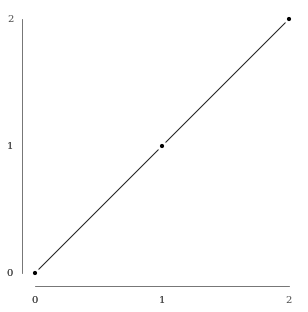

In [2]:
tufte.line(range(3), range(3), figsize=(5, 5))

You'll notice that the default Tufte line style includes circle markers with gaps between line segments. You are also able to specify the figure size directly to the `line` function.

There are several other differences. We'll create another plot below as an example.

(<matplotlib.figure.Figure at 0x1109a9d50>,
 <matplotlib.axes._subplots.AxesSubplot at 0x110917090>)

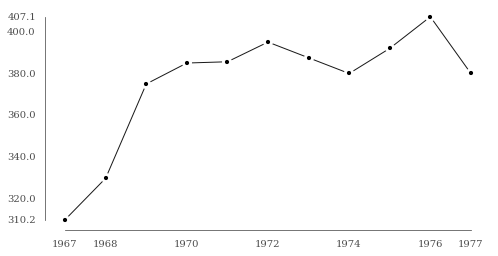

In [3]:
x = range(1967, 1977 + 1)
y = [310.2, 330, 375, 385, 385.6, 395, 387.5, 380, 392, 407.1, 380]

tufte.line(x, y, figsize=(8, 4))

First, we use Tufte's _range-frame_ concept, which aims to make the frame (axis) lines "effective data-communicating element[s]" by showing the minimum and maximum values in each axis. This way, the tick labels are more informative. In this example, the range of the outcome variable is 96.9 units (407.1 - 310.2). Similarly, this data covers the years 1967 through 1977, inclusive.

The range-frame is applied to both axes for line and scatter plots.

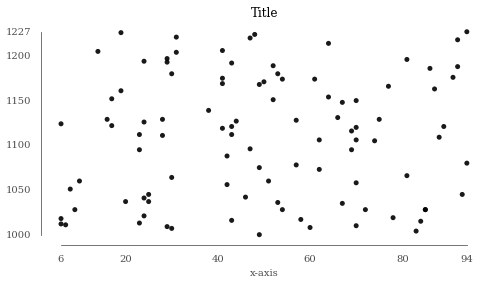

In [4]:
np.random.seed(8675309)

fig, ax = tufte.scatter(np.random.randint(5, 95, 100), np.random.randint(1000, 1234, 100), figsize=(8, 4))

plt.title('Title')
ax.set_xlabel('x-axis')

You'll also notice that `tufte.scatter()` returns figure and axis objects. This is true for all `tufte` plots. With this, we can add a title to the figure and a label to the x-axis, for example. `tufte` plots are meant to be able to interact with `matplotlib` functions and methods.

When you need to create a bar plot, do the following.

(<matplotlib.figure.Figure at 0x110a629d0>,
 <matplotlib.axes._subplots.AxesSubplot at 0x110af0250>)

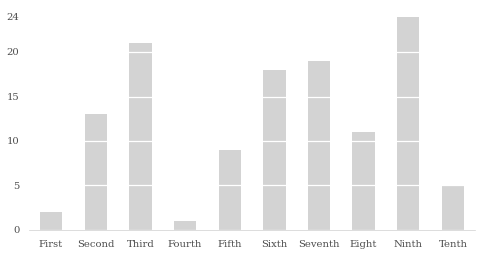

In [5]:
np.random.seed(8675309)

tufte.bar(range(10),
          np.random.randint(1, 25, 10),
          label=['First', 'Second', 'Third', 'Fourth', 'Fifth',
                 'Sixth', 'Seventh', 'Eight', 'Ninth', 'Tenth'],
          figsize=(8, 4))

A feature of the `bar()` function is the ability for x-axis labels to auto-rotate. We can see this when we change the one of the labels.

(<matplotlib.figure.Figure at 0x110ce54d0>,
 <matplotlib.axes._subplots.AxesSubplot at 0x110cda510>)

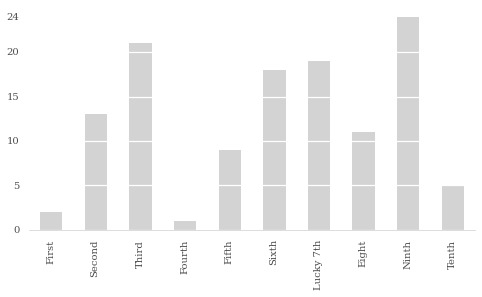

In [6]:
np.random.seed(8675309)

tufte.bar(range(10),
          np.random.randint(1, 25, 10),
          label=['First', 'Second', 'Third', 'Fourth', 'Fifth',
                 'Sixth', 'Lucky 7th', 'Eight', 'Ninth', 'Tenth'],
          figsize=(8, 4))

Tufte's boxplot is, perhaps, the most radical redesign of an existing plot. His approach is to maximize data-ink, the "non-erasable core of a graphic," by removing unnecessary elements. The boxplot removes boxes (which is why we refer to it as `bplot()`) and caps and simply shows a dot between two lines. This plot currently only takes a `list`, `np.ndarray`, or `pd.DataFrame`.

Let's create a DataFrame.

(<matplotlib.figure.Figure at 0x110ce5c10>,
 <matplotlib.axes._subplots.AxesSubplot at 0x110d2c0d0>)

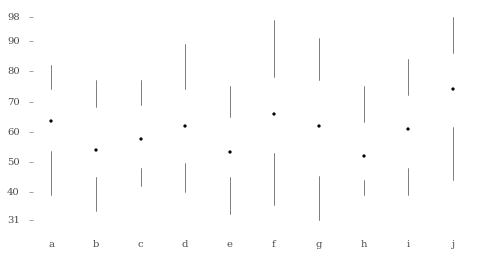

In [7]:
n_cols = 10 # Must be less than or equal to 26
size = 100

letters = string.ascii_lowercase

df_dict = defaultdict(list)
for c in letters[:n_cols]:
    df_dict[c] = np.random.randint(random.randint(25, 50), random.randint(75, 100), size)

df = pd.DataFrame(df_dict)

tufte.bplot(df, figsize=(8, 4))

The dot represents the median and the lines correspond to the top and bottom 25% of the data. The empty space between the lines is the interquartile range.

## Issues

### Range-Frame

You may have noticed&mdash;if you cloned this repo and ran the notebook&mdash;that the range-frame feature isn;t perfect. It is possible, for example, for a minimum or maximum value to be _too_ close to an existing tick label, causing overlap.

Additionally, in cases where the data in a given dimension (`x` or `y`) contains `float` values, the tick labels are converted to float. (This isn't the issue.)

(<matplotlib.figure.Figure at 0x110ce5cd0>,
 <matplotlib.axes._subplots.AxesSubplot at 0x110dee750>)

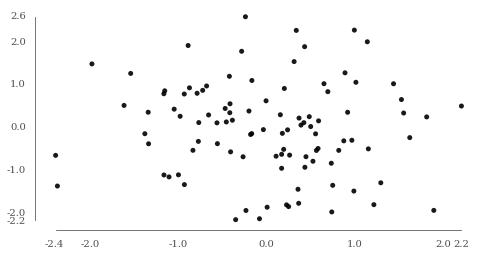

In [8]:
np.random.seed(8675309)

tufte.scatter(np.random.randn(100), np.random.randn(100), figsize=(8, 4))

This becomes problematic based on our decision to round to the nearest tenth. In this example, the maximum value on the y-axis might be 2.56, which gets rounded to 2.6. A reader might incorrectly conclude that the maximum value in `y` is 2.6.

(The above plot also shows what can happen with the minimum or maximum value is too close to an existing tick label. See -2.2 and -2.0 in `y`.)

## Development

Tufte's book provides many useful and functional plots, many of which we plan to add to this module.